In [1]:
# Task 1. Data Collection and Preprocessing 
# Tasks:
# Collect a dataset of labeled news articles, such as a dataset that includes categories like sports, politics, and technology.
# Clean and preprocess the text data, ensuring it's ready for feature extraction.
# Handle missing data, if any, and perform any necessary steps to prepare the text for model training.
# Steps: 1
# Load the dataset and check for missing values:

import pandas as pd

# Load the news article dataset 
df = pd.read_csv('data_news.csv') 

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(df.head())

# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

# Handle missing data (if any)
df = df.dropna(subset=['category', 'headline', 'short_description'])  # Remove rows with missing category or headline


Dataset shape: (50000, 5)
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want t

In [3]:
# steps 2 
# Text Preprocessing:
# Remove punctuation, stop words, and special characters.
# Tokenize the text into words.
# Lemmatize the words to get their base forms.

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize and remove stopwords, then lemmatize
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing to the 'headline' and 'short_description' columns
df['processed_headline'] = df['headline'].apply(preprocess_text)
df['processed_description'] = df['short_description'].apply(preprocess_text)

# Check the first few rows of the processed data
df.head()


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,headline,links,short_description,keywords,processed_headline,processed_description
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons,143 mile 35 day lesson learned,resting part training ive confirmed sort alrea...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy,talking crazy crazy helpful,think talking tool coach challenge narrate exp...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug,crenezumab trial gauge whether alzheimers drug...,clock ticking united state find cure team work...
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life,oh difference made,want busy keep trying perfect want happy focus...
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods,green superfoods,first bad news soda bread corned beef beer hig...


In [5]:
# step 3 
# Feature Extraction:
# Convert the text data into numerical features using methods like TF-IDF, Word2Vec, or Bag-of-Words.
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine headline and description for feature extraction
df['combined_text'] = df['processed_headline'] + " " + df['processed_description']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features for simplicity
X = vectorizer.fit_transform(df['combined_text']).toarray()

# Convert the categorical labels into numerical format
y = df['category'].map({'sports': 0, 'politics': 1, 'technology': 2})  # Modify categories as needed

print(f"Shape of feature matrix X: {X.shape}")


Shape of feature matrix X: (50000, 5000)


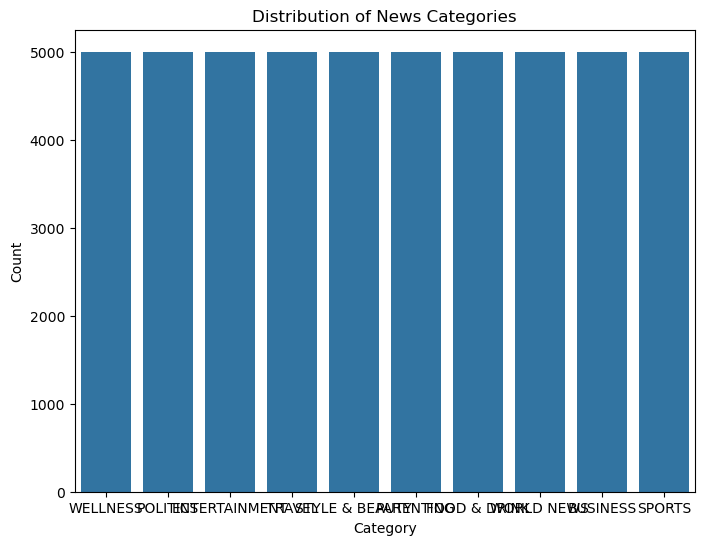

In [7]:
# Task 2. Feature Extraction 
# Tasks:
# Use methods like TF-IDF or Word2Vec to convert text data into numerical features.
# Perform exploratory data analysis (EDA) to understand the distribution of different categories.
# Steps 1 :
# Exploratory Data Analysis (EDA):
# Visualize the distribution of categories.
# Check for class imbalance and other trends in the dataset.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [9]:
# Task 3. Model Development and Training 
# Tasks:
# Build classification models using algorithms such as Logistic Regression, Naive Bayes, and Support Vector Machines (SVM).
# Train the models on preprocessed text data, tuning hyperparameters as necessary.
# Use cross-validation to evaluate the performance of each model.
# Steps 1 
# Split the data into training and testing sets:


from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (40000, 5000)
Testing data shape: (10000, 5000)


In [37]:
# step 2 
# Train classification models:
# Logistic Regression, Naive Bayes, and Support Vector Machine (SVM).

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(classification_report(y_test, lr_pred))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, nb_pred)}")
print(classification_report(y_test, nb_pred))

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print(classification_report(y_test, svm_pred))







ValueError: Input y contains NaN.

In [39]:
# step 3
# Cross-validation:
# Use cross-validation to ensure robust evaluation of model performance.

from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(lr_model, X, y, cv=5)
print(f"Logistic Regression Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")




ValueError: Found input variables with inconsistent numbers of samples: [50000, 0]

In [41]:
# Task 4. Model Evaluation 
# Tasks:
# Evaluate the models using accuracy, precision, recall, F1-score, and confusion matrix.
# Compare the performance of different models and select the best one for classification.
# Steps 1:
# Confusion Matrix and Evaluation Metrics:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sports', 'Politics', 'Technology'], yticklabels=['Sports', 'Politics', 'Technology'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


NameError: name 'lr_pred' is not defined

In [44]:
#  conclusion
#  In this project, you will preprocess text data, extract features using TF-IDF,
# train various classification models, and evaluate their performance. You will also conduct an exploratory 
# data analysis (EDA), compare the models using standard metrics, and present your findings in a report and presentation. 
# The goal is to automate the classification of news articles into categories like sports, politics, and technology.


In [ ]:
# Video link 
#  https://drive.google.com/file/d/1Y3O-wFOu3CMpiVWdaJc_M-KJjMfachUo/view?usp=drivesdk